# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



## Importaciones

In [86]:
import pandas as pd 
import matplotlib.pyplot as plt

## Actividad 1

Se crea el DataFrame cargando el archivo CSV con la funcion "read_csv" de pandas y se guarda en la variable "df"

In [56]:
df = pd.read_csv("datasets_calificaciones.csv")

## Actividad 2

- Se utilizo la funcion **"head()"** para mostrar las primeras filas
- Con **"info()"** se obtiene un resumen del DataFrame como tl tipo de datos de las columnas y la cantidad de valores no nulos
- **"describe()"** calcula estadísticas descriptivas de las columnas numéricas

In [4]:
print("Primeras 5 columnas:\n")
print(df.head())

print("\nTipos de datos y total de valroes nulos:\n")
print(df.info())

print("\nEstadísticas\n")
df.describe()

Primeras 5 columnas:

        estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
0        ana pérez  matematicas         8       7.5     9        95%
1     carlos lópez       fisica       6.2         7   NaN        88%
2      maría gómez      quimica         9       8.8   9.5       100%
3  pedro rodríguez     historia       7.5         6     7         75
4     laura vargas  matematicas                 9.2   8.5        92%

Tipos de datos y total de valroes nulos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None

Estadísticas



,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
count,100,100,95,90,89,100
unique,96,7,49,45,46,35
top,mateo díaz,matematicas,,7.5,9.5,99%
freq,2,25,7,5,4,5


## Actividad 3

1. Se capitalizan los valores de las columnas **"Estudiante"** y **"Materia"**.

2. Con un loop, se transforman en números todos los valores de las columnas **"Parcial 1"**, **"Parcial 2"** y **"Final"**, luego se rellenan los valores nulos con la mediana de la columna.

3. Se quita el símbolo de porcentaje de los valores de **"Asistencia"** y se guardan otra vez como números enteros, para depués limitar el valor máximo a *100*.

In [ ]:

df["estudiante"] = df["estudiante"].str.title()
df["Materia"] = df["Materia"].str.title()

for col in ["Parcial 1", "Parcial 2", "Final"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].fillna(df[col].median())

df["Asistencia"] = df["Asistencia"].str.replace('%', '').astype(int)
df["Asistencia"] = df["Asistencia"].clip(lower=0, upper=100)

## Actividad 4
En el primer bloque de código:
- Se utilizan las mismas funciones del punto 2 para mostrar la diferencia entre los datos después del proceso de normalización de datos, se pueden ver cambios como:
    - Nombres de estudiantes y materias capitalizados
    - Las columnas de notas como "float" en lugar de "object"
    - La columna asistencia sin el símbolo de porcentaje ni valores fuera de lo normal

En el segundo bloque de código:
- Se crea una nueva columna con los promedios de cada alumno
- Se calcula la media de la tabla "Promedio" y se agrupa por materia 

In [66]:
print("Primeras 5 columnas:\n")
print(df.head())

print("\nTipos de datos y total de valroes nulos:\n")
print(df.info())

print("\nEstadísticas:")
df.describe().round(1)

Primeras 5 columnas:

        estudiante      Materia  Parcial 1  Parcial 2  Final  Asistencia
0        Ana Pérez  Matematicas        8.0        7.5    9.0          95
1     Carlos López       Fisica        6.2        7.0    7.8          88
2      María Gómez      Quimica        9.0        8.8    9.5         100
3  Pedro Rodríguez     Historia        7.5        6.0    7.0          75
4     Laura Vargas  Matematicas        7.9        9.2    8.5          92

Tipos de datos y total de valroes nulos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudiante  100 non-null    object 
 1   Materia     100 non-null    object 
 2   Parcial 1   100 non-null    float64
 3   Parcial 2   100 non-null    float64
 4   Final       100 non-null    float64
 5   Asistencia  100 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB
None

,Parcial 1,Parcial 2,Final,Asistencia
count,100.0,100.0,100.0,100.0
mean,7.8,7.8,7.9,88.2
std,1.1,1.1,1.1,8.4
min,5.5,5.8,5.7,70.0
25%,7.1,7.0,7.1,81.8
50%,7.9,7.7,7.8,88.5
75%,8.8,8.8,8.8,96.0
max,9.9,9.9,9.9,100.0


In [82]:
df["Promedio"] = df[["Parcial 1", "Parcial 2", "Final"]].mean(axis=1).round(2)
print(df[["estudiante", "Promedio"]])

print("\nPromedio por materia:")
print(df.groupby("Materia")["Promedio"].mean().round(2))

         estudiante  Promedio
0         Ana Pérez      8.17
1      Carlos López      7.00
2       María Gómez      9.10
3   Pedro Rodríguez      6.83
4      Laura Vargas      8.53
..              ...       ...
95  Josefina Torres      7.13
96  Bautista Vargas      8.30
97        Emma Soto      6.67
98       Mateo Díaz      9.00
99  Sofía Fernández      7.40

[100 rows x 2 columns]

Promedio por materia:
Materia
Ciencias Sociales       8.80
Fisica                  6.68
Historia                7.29
Literatura Universal    8.00
Matematicas             8.26
Programacion Basica     6.70
Quimica                 9.14
Name: Promedio, dtype: float64


## Actividad 5

- **Gráfico 1**: Histograma que muestra la distribución de promedios finales de los estudiantes.
- **Gráfico 2**: Dispersión que compara la asistencia con el promedio final.
- **Gráfico 3**: Gráfico de barras que muestra el promedio de notas de cada materia



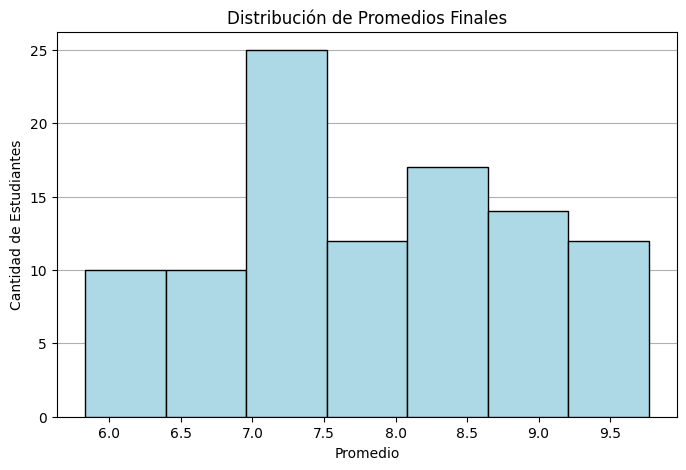

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df["Promedio"], bins=7, color='lightblue', edgecolor='black', zorder=3  )
plt.title("Distribución de Promedios Finales")
plt.xlabel("Promedio")
plt.ylabel("Cantidad de Estudiantes")
plt.grid(axis="y", zorder=0)
plt.show()

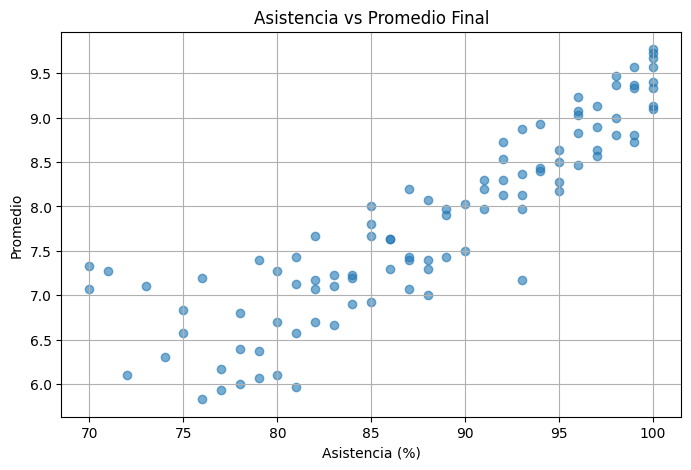

In [104]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Asistencia"], df["Promedio"], alpha=0.6)
plt.title("Asistencia vs Promedio Final")
plt.xlabel("Asistencia (%)")
plt.ylabel("Promedio")
plt.grid(True)
plt.show()

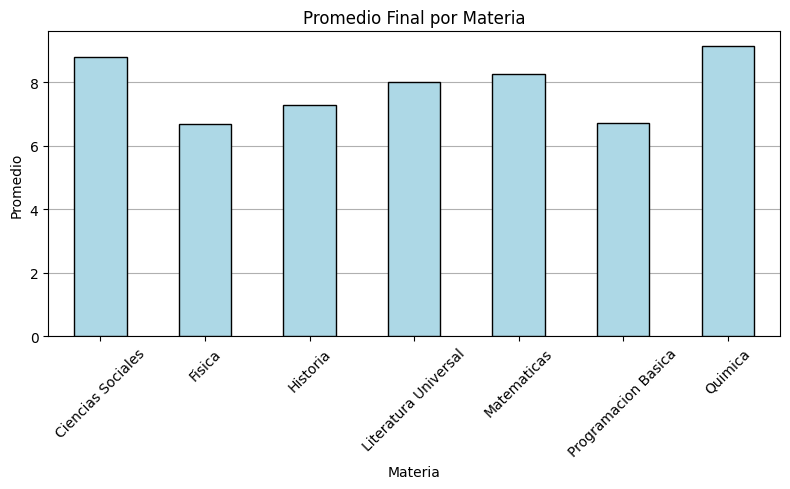

In [124]:
plt.figure(figsize=(8, 5))
df.groupby("Materia")["Promedio"].mean().plot(kind="bar", color='lightblue', edgecolor='black', zorder=3)
plt.title("Promedio Final por Materia")
plt.xlabel("Materia")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.grid(True, axis='y', zorder=0)
plt.tight_layout()
plt.show()